In [1]:
import sys
import os
import sklearn
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
sys.path.append('.')
sys.path.append('..')


remove_stopwords = True
stop_word_lang = 'english'


In [2]:

dfTickets = pd.read_excel("C:/Users/nasse/Downloads/Worksheet_in_Ticket_Classification_Task.xlsm", engine='openpyxl')


In [3]:
dfTickets.isna().sum()

Document       0
Topic_group    0
dtype: int64

In [4]:
dfTickets.shape

(47837, 2)

In [5]:
dfTickets.head()

,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous


In [6]:
dfTickets['Document'][0], dfTickets['Topic_group'][0]

('connection with icon icon dear please setup icon per icon engineers please let other details needed thanks lead',
 'Hardware')

In [7]:
data = dfTickets['Document']
label = dfTickets['Topic_group']


<AxesSubplot: >

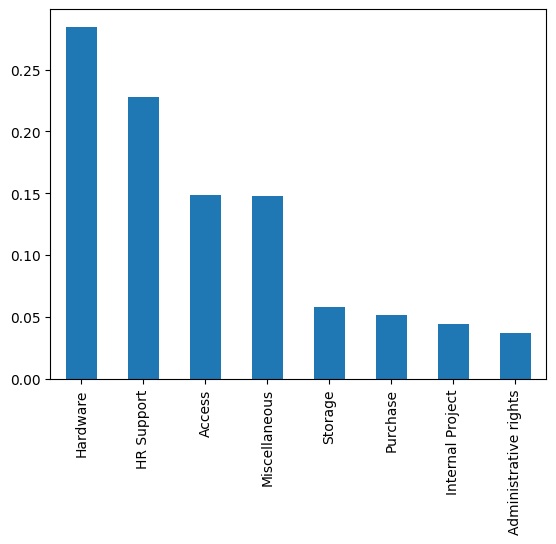

In [8]:
label.value_counts(normalize=True).plot(kind='bar')

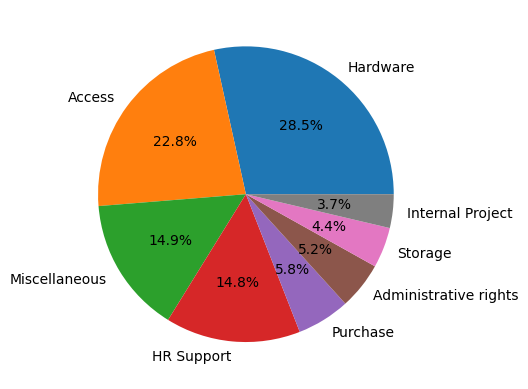

In [9]:
plt.pie(label.value_counts(), labels=label.unique().tolist(), autopct='%1.1f%%')
plt.show()

length of first document

In [10]:
print(f'length of the first document: {len(data[0])}')

length of the first document: 111


In [11]:
dfTickets['Document'][3]

'reset passwords for external accounts re expire days hi ask help update passwords colleagues thank pm expire days importance high hi received about expiration please kindly help prolongation best regards pm expire days importance high dear expire days order change please follow steps prerequisites disable device credentials close active connected by cable machine note also follow steps detailed press ctrl alt delete same pops change item enter format enter enter newly chosen then re enter again submit displaying has changed os machine browse enter format enter gear icon top tight browser window enter enter newly chosen then re enter again save connected note complete resources granted once connected by cable browse tick want change after logging enter format enter log enter enter newly chosen then re enter again change clients suppliers about expire please touch person then communicate back encounter issues hesitate by accessing yours'

In [12]:
dfTickets['doc_length'] = dfTickets['Document'].apply(lambda x: len(nltk.word_tokenize(x)))
dfTickets['doc_length']


0         18
1         19
2         14
3        145
4         15
        ... 
47832    155
47833     22
47834     59
47835     58
47836     52
Name: doc_length, Length: 47837, dtype: int64

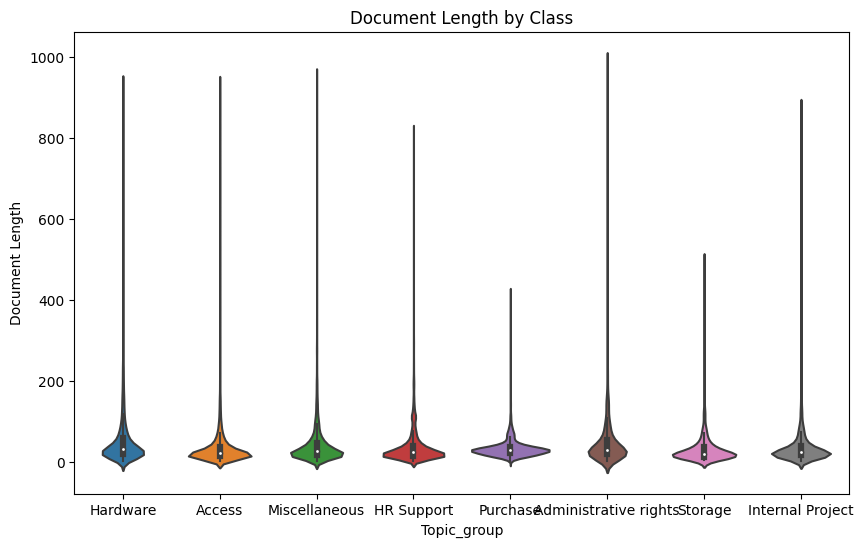

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='Topic_group', y='doc_length', data=dfTickets)
plt.xlabel('Topic_group')
plt.ylabel('Document Length')
plt.title('Document Length by Class')
plt.show()

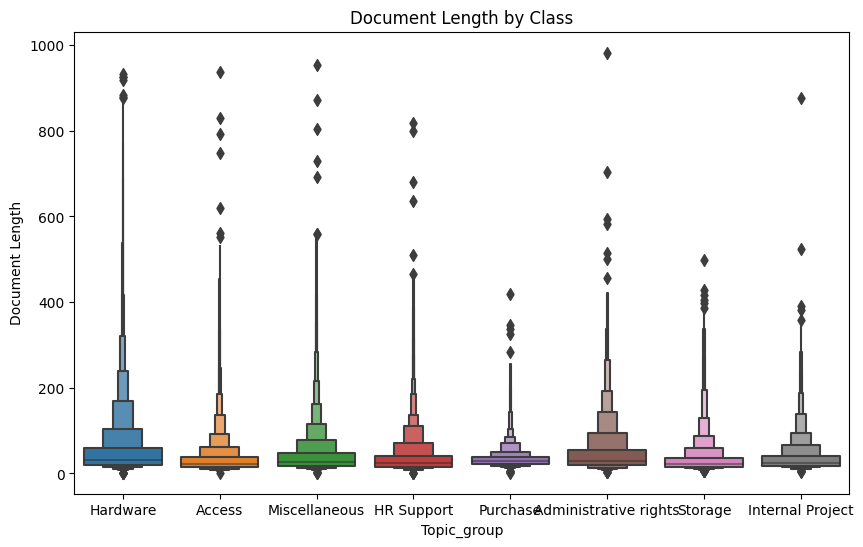

In [14]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Topic_group', y='doc_length', data=dfTickets)
plt.xlabel('Topic_group')
plt.ylabel('Document Length')
plt.title('Document Length by Class')
plt.show()

In [15]:
word_count = data[0].split()
print(f'word count of the first document: {len(word_count)}')

word count of the first document: 18


In [16]:
stemmer = SnowballStemmer("english", ignore_stopwords=True)

stop_words = set(stopwords.words("english"))

In [17]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nasse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nasse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nasse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
data[0]

'connection with icon icon dear please setup icon per icon engineers please let other details needed thanks lead'

In [19]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    if remove_stopwords:
        tokens = [word for word in tokens if word not in stop_words]
    
    # Stem the tokens
    # tokens = [stemmer.stem(word) for word in tokens]
    
    tokens = list(dict.fromkeys(tokens))
    
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    
    return preprocessed_text

# Apply the preprocessing function to the data
data = data.apply(preprocess_text)
data.head()

0    connection icon dear please setup per engineer...
1    work experience user hi student coming next na...
2    requesting meeting hi please help follow equip...
3    reset passwords external accounts expire days ...
4    mail verification warning hi got attached plea...
Name: Document, dtype: object

In [20]:
data[0]

'connection icon dear please setup per engineers let details needed thanks lead'

In [21]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data)

In [22]:
X_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
tfidf_vect = TfidfVectorizer()

In [24]:
tfidf_matrix = tfidf_vect.fit_transform(data)
tfidf_sum = tfidf_matrix.sum(axis=0)
terms = tfidf_vect.get_feature_names()
term_freq = tfidf_sum.A1
term_freq_dict = dict(zip(terms, term_freq))

C:\Users\nasse\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_freq_dict)


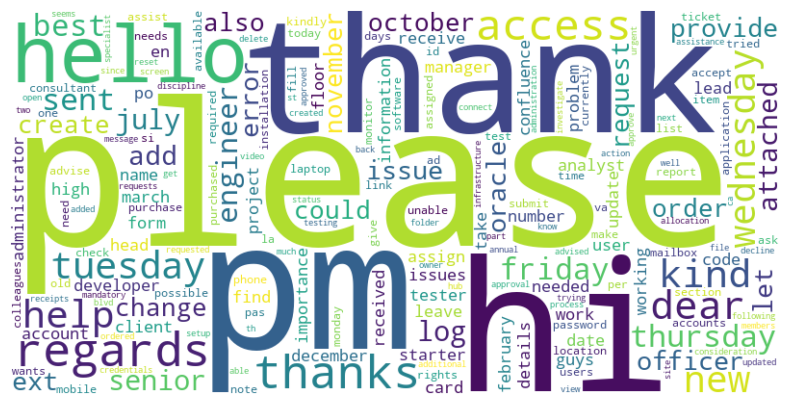

In [26]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
def word_freq_chart(df):
    all_words = [word for tokens in df for word in tokens]
    word_freq = nltk.FreqDist(all_words)
    common_words = word_freq.most_common(20)  # Top N most frequent words

    # Plot the top N most frequent words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[word[1] for word in common_words], y=[word[0] for word in common_words])
    plt.title('Top 20 Most Common Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

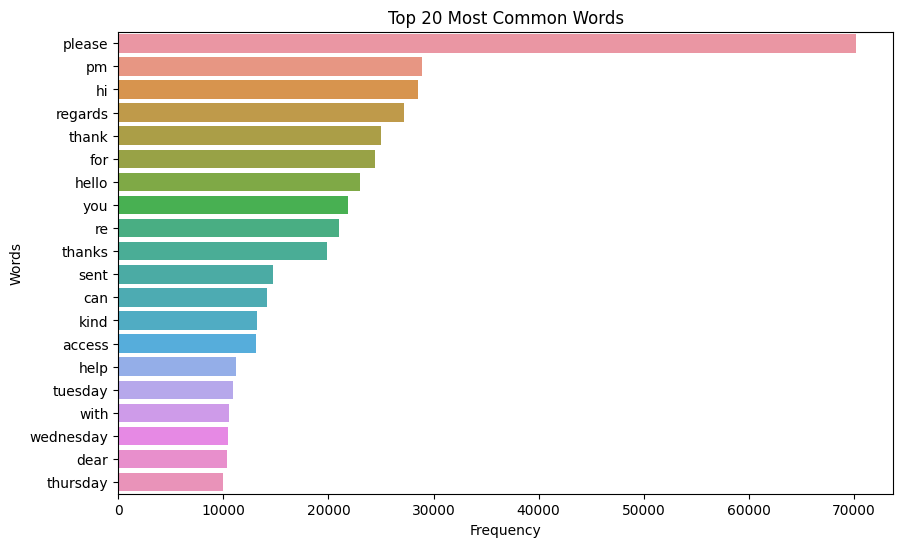

In [28]:
# Tokenize the text
dfTickets['tokens'] = dfTickets['Document'].apply(word_tokenize)
word_freq_chart(dfTickets['tokens'])

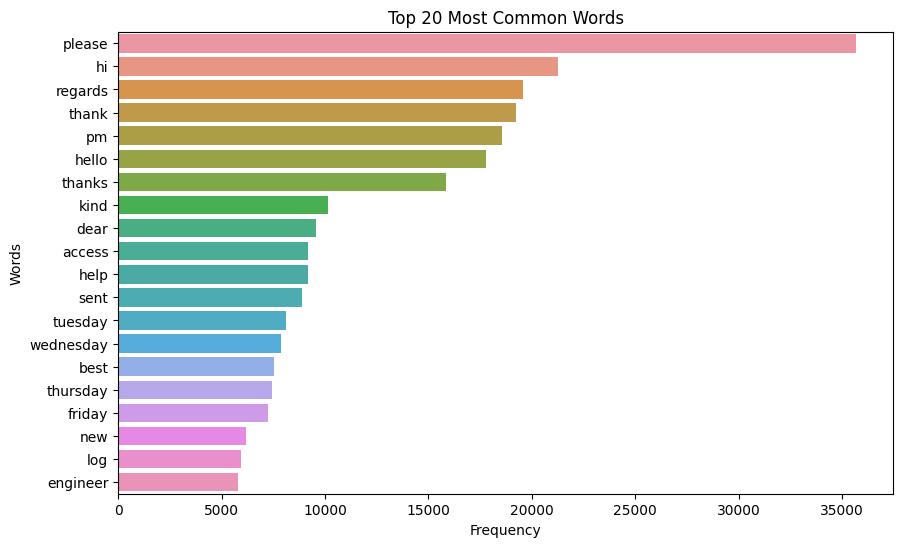

In [29]:
pre_process_freq = data.apply(word_tokenize)
word_freq_chart(pre_process_freq)

In [30]:
data[0]

'connection icon dear please setup per engineers let details needed thanks lead'

In [31]:
tfidf_sum = tfidf_matrix.sum(axis=0).A1 
terms = tfidf_vect.get_feature_names_out()
tfidf_freq = dict(zip(terms, tfidf_sum))

sorted_tfidf_freq = sorted(tfidf_freq.values(), reverse=True)

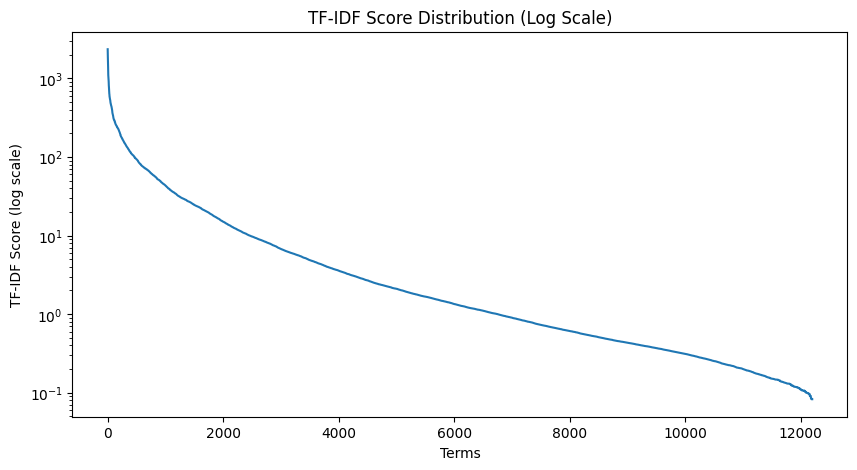

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(sorted_tfidf_freq)
plt.yscale("log")  
plt.title("TF-IDF Score Distribution (Log Scale)")
plt.xlabel("Terms")
plt.ylabel("TF-IDF Score (log scale)")
plt.show()


In [33]:
add_documents_length = False
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vect.get_feature_names_out())

if add_documents_length:
    tfidf_df['doc_length'] = dfTickets['doc_length']

print(tfidf_df)

        ab  abandon  abandoned  abbott  abbreviations  abc  abeam  abilities  \
0      0.0      0.0        0.0     0.0            0.0  0.0    0.0        0.0   
1      0.0      0.0        0.0     0.0            0.0  0.0    0.0        0.0   
2      0.0      0.0        0.0     0.0            0.0  0.0    0.0        0.0   
3      0.0      0.0        0.0     0.0            0.0  0.0    0.0        0.0   
4      0.0      0.0        0.0     0.0            0.0  0.0    0.0        0.0   
...    ...      ...        ...     ...            ...  ...    ...        ...   
47832  0.0      0.0        0.0     0.0            0.0  0.0    0.0        0.0   
47833  0.0      0.0        0.0     0.0            0.0  0.0    0.0        0.0   
47834  0.0      0.0        0.0     0.0            0.0  0.0    0.0        0.0   
47835  0.0      0.0        0.0     0.0            0.0  0.0    0.0        0.0   
47836  0.0      0.0        0.0     0.0            0.0  0.0    0.0        0.0   

       ability  able  ...  zip  zipped 

In [34]:
tfidf_df.shape

(47837, 12204)

In [35]:
tfidf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47837 entries, 0 to 47836
Columns: 12204 entries, ab to zori
dtypes: float64(12204)
memory usage: 4.3 GB


In [36]:
tfidf_df.describe()

,ab,abandon,abandoned,abbott,abbreviations,abc,abeam,abilities,ability,able,...,zip,zipped,zipper,zipping,zn,zone,zones,zoom,zooming,zori
count,47837.000000,47837.000000,47837.000000,47837.000000,47837.000000,47837.000000,47837.000000,47837.000000,47837.000000,47837.000000,...,47837.000000,47837.000000,47837.000000,47837.000000,47837.000000,47837.000000,47837.000000,47837.000000,47837.000000,47837.000000
mean,0.000144,0.000013,0.000087,0.000004,0.000003,0.000050,0.000018,0.000039,0.000518,0.004714,...,0.000142,0.000026,0.000044,0.000009,0.000003,0.002799,0.000042,0.000057,0.000006,0.000011
std,0.006632,0.001784,0.005405,0.000817,0.000688,0.004496,0.002736,0.003407,0.011366,0.030278,...,0.006647,0.002707,0.004954,0.001882,0.000626,0.026993,0.003440,0.004261,0.001414,0.002479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.644356,0.324062,0.546222,0.178675,0.150579,0.550494,0.477514,0.425263,0.537492,0.565150,...,0.487306,0.370845,0.685954,0.411652,0.136887,0.578511,0.364152,0.445205,0.309319,0.542264


In [37]:
tfidf_df

,ab,abandon,abandoned,abbott,abbreviations,abc,abeam,abilities,ability,able,...,zip,zipped,zipper,zipping,zn,zone,zones,zoom,zooming,zori
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, label, test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)

In [49]:
from sklearn.linear_model import LogisticRegression


classifier = LogisticRegression()

classifier.fit(X_train, y_train)

C:\Users\nasse\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
X_test_standard = scaler_standard.transform(X_test)

In [50]:
predictions = classifier.predict(X_test)


In [52]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

print(classification_report(y_test, predictions))

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

print(f1_score(y_test, predictions, average='weighted'))


                       precision    recall  f1-score   support

               Access       0.88      0.83      0.86      1455
Administrative rights       0.86      0.64      0.73       342
           HR Support       0.84      0.80      0.82      2107
             Hardware       0.76      0.87      0.81      2760
     Internal Project       0.89      0.76      0.82       451
        Miscellaneous       0.76      0.78      0.77      1400
             Purchase       0.97      0.86      0.91       497
              Storage       0.91      0.81      0.86       556

             accuracy                           0.82      9568
            macro avg       0.86      0.79      0.82      9568
         weighted avg       0.83      0.82      0.82      9568

Accuracy: 0.82
0.8199866311926216


In [45]:
import joblib

# Assuming `model` is your trained scikit-learn model
joblib.dump(classifier, 'model.pkl')

['model.pkl']

In [127]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

               Access       0.90      0.83      0.86      1455
Administrative rights       0.90      0.56      0.69       342
           HR Support       0.82      0.83      0.82      2107
             Hardware       0.73      0.89      0.80      2760
     Internal Project       0.90      0.72      0.80       451
        Miscellaneous       0.81      0.71      0.76      1400
             Purchase       0.99      0.85      0.91       497
              Storage       0.93      0.75      0.83       556

             accuracy                           0.81      9568
            macro avg       0.87      0.77      0.81      9568
         weighted avg       0.82      0.81      0.81      9568



In [131]:
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.812328627240949

In [ ]:
# using Support Vector Machine
from sklearn.svm import SVC

classifier = SVC(kernel='linear', C=1.0)
classifier.fit(X_train, y_train)

In [245]:
y_pred = classifier.predict(X_test)

In [246]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.8179347826086957
                       precision    recall  f1-score   support

               Access       0.88      0.84      0.86      1455
Administrative rights       0.88      0.63      0.73       342
           HR Support       0.85      0.81      0.83      2107
             Hardware       0.76      0.87      0.81      2760
     Internal Project       0.85      0.76      0.80       451
        Miscellaneous       0.76      0.77      0.76      1400
             Purchase       0.97      0.85      0.91       497
              Storage       0.90      0.83      0.86       556

             accuracy                           0.82      9568
            macro avg       0.85      0.79      0.82      9568
         weighted avg       0.82      0.82      0.82      9568



In [46]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

C:\Users\nasse\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\nasse\AppData\Roaming\Python\Python310\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\nasse\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to ac

KeyboardInterrupt: 

In [ ]:
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    
    with torch.no_grad():  
        outputs = model(**inputs)
    

    embeddings = outputs.last_hidden_state.mean(dim=1)
    
    return embeddings.squeeze().numpy() 

In [ ]:
dfTickets['BERT_Embedding'] = dfTickets['Document'].apply(get_bert_embedding)

In [ ]:
X = np.vstack(dfTickets['BERT_Embedding'].values)
y = dfTickets['label'] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier on the BERT embeddings
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate model performance
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)